In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report


In [2]:
data = pd.read_csv('diabetes.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(array([  5.,   0.,   0.,   0.,   1.,   3.,   7.,  25.,  63.,  93., 117.,
         94., 102.,  61.,  54.,  41.,  31.,  25.,  28.,  18.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <BarContainer object of 20 artists>)

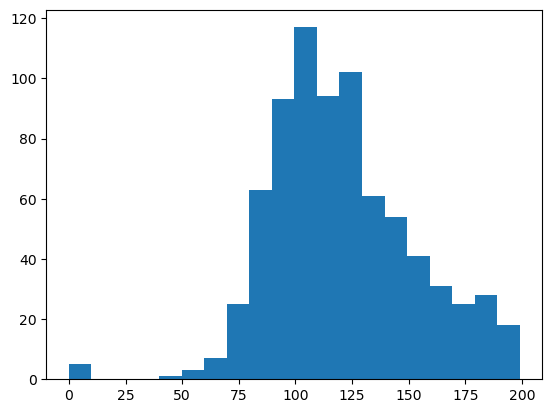

In [32]:
data.head()
data.info()
data.isna().sum()
plt.hist(x=data['Glucose'], bins=20)

<Axes: xlabel='Glucose', ylabel='Count'>

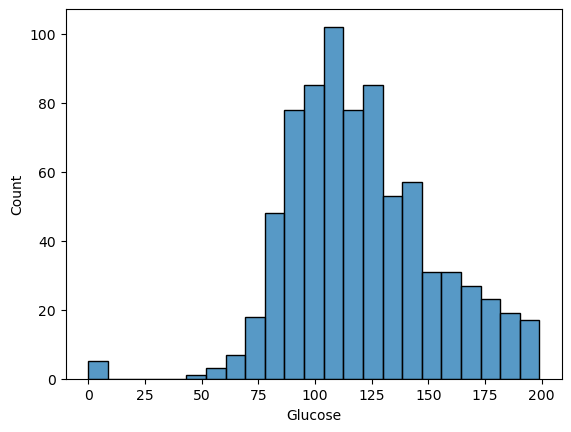

In [34]:
sns.histplot(data=data,x = data['Glucose'])

C:\Users\nehagour\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


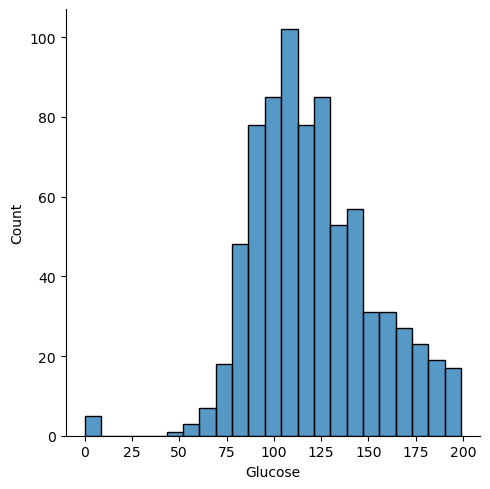

In [37]:
sns.displot(data['Glucose'])

C:\Users\nehagour\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


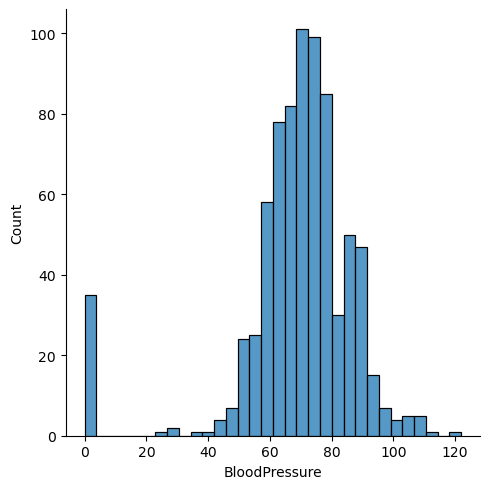

In [38]:
sns.displot(data['BloodPressure'])

C:\Users\nehagour\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


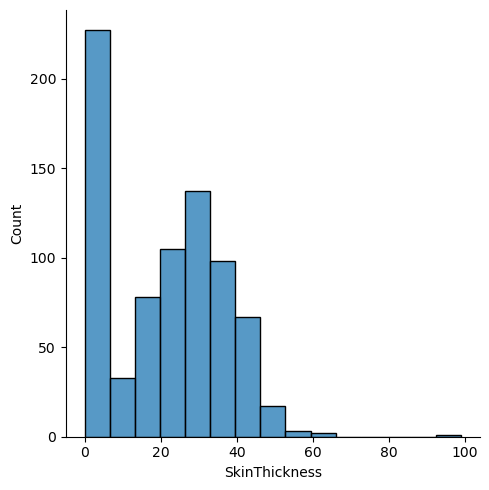

In [39]:
sns.displot(data['SkinThickness'])

C:\Users\nehagour\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


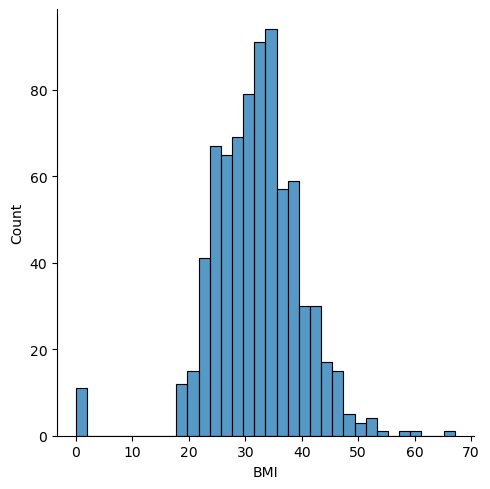

In [40]:
sns.displot(data['BMI'])

<Axes: xlabel='Age', ylabel='count'>

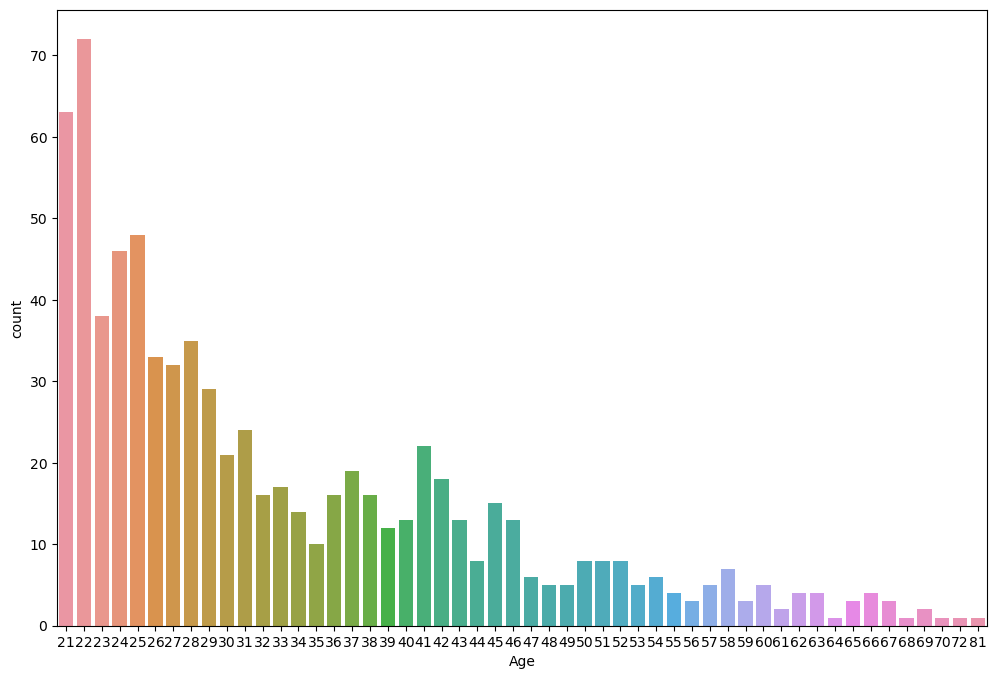

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x=data['Age'])

<Axes: xlabel='Outcome', ylabel='count'>

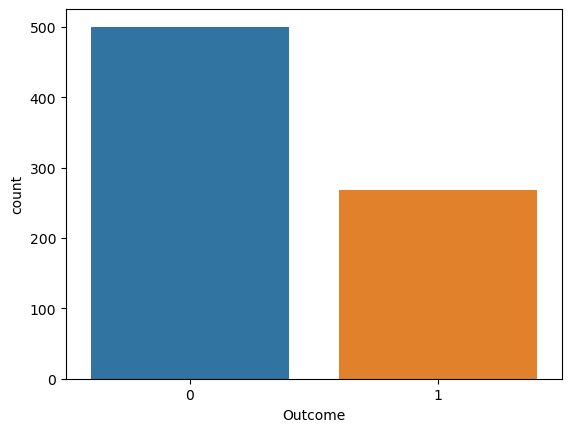

In [46]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in col:
    data[i].replace(0,data[i].median(),inplace=True)
sns.countplot(x=data['Outcome'])

In [47]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

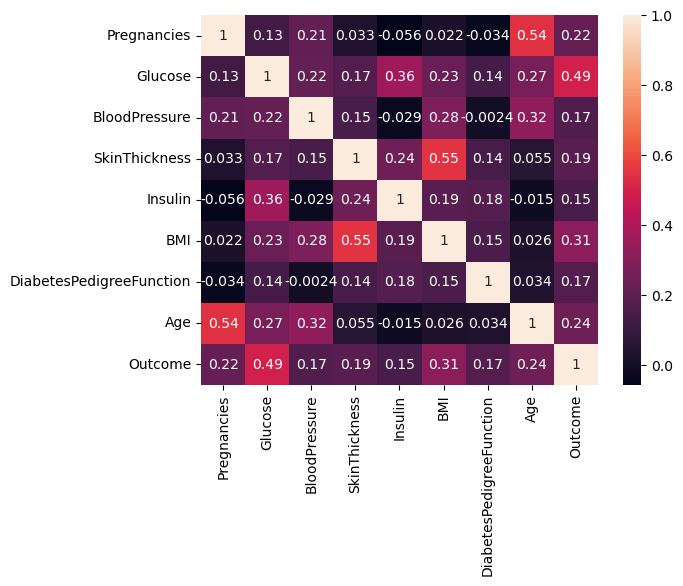

In [48]:
sns.heatmap(data.corr(), annot=True)

In [49]:
X = data.iloc[:, :-1].values
Y = data.iloc[:,-1].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state=101)

In [51]:
X_train.shape

(576, 8)

In [52]:
X_test.shape

(192, 8)

In [91]:
X_train

array([[-0.8260532 , -0.87440392,  0.13043162, ..., -0.94689243,
         0.63088494,  0.22975102],
       [ 1.5709576 , -2.13487236,  0.63296415, ...,  0.04371807,
        -1.20512382,  0.64880292],
       [-1.12567955, -1.23927636, -0.70712259, ...,  0.47441828,
         0.22359011, -1.02740468],
       ...,
       [-0.8260532 , -0.07831858, -2.38223101, ...,  0.43134826,
        -0.61963749, -0.69216316],
       [ 0.3724522 , -0.21099947,  0.29794246, ..., -0.18598872,
        -0.41917206,  0.90023407],
       [ 1.5709576 ,  0.28655386, -0.20459007, ...,  0.2447115 ,
         0.56406313,  0.98404445]])

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [93]:
X_train

array([[-0.8260532 , -0.87440392,  0.13043162, ..., -0.94689243,
         0.63088494,  0.22975102],
       [ 1.5709576 , -2.13487236,  0.63296415, ...,  0.04371807,
        -1.20512382,  0.64880292],
       [-1.12567955, -1.23927636, -0.70712259, ...,  0.47441828,
         0.22359011, -1.02740468],
       ...,
       [-0.8260532 , -0.07831858, -2.38223101, ...,  0.43134826,
        -0.61963749, -0.69216316],
       [ 0.3724522 , -0.21099947,  0.29794246, ..., -0.18598872,
        -0.41917206,  0.90023407],
       [ 1.5709576 ,  0.28655386, -0.20459007, ...,  0.2447115 ,
         0.56406313,  0.98404445]])

In [94]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.7239583333333334
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       124
           1       0.60      0.65      0.62        68

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



In [95]:
y_pred_train = classifier.predict(X_train)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_pred_train,Y_train))
#this is Overfitting as our train data is 100% accurate and 72% accuracy in test data

1.0


In [96]:
#by adding below parameters we are able to control the overfitting(train =1 , test = 72)  and able to get better accuracy in this case
#basically this is mannual hyperparameter training to make it automatic lets learn GridSearchCV ALGORITHM 
classifier1 = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2)
classifier1.fit(X_train, Y_train)
y_pred1 = classifier1.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
y_pred1_train = classifier1.predict(X_train)
print(accuracy_score(Y_train,y_pred1_train))

0.765625
0.7708333333333334


************************************************************************

In [107]:
#GRIDSEARCHCV  --- SYSTMATICSEARCH-- PREDEFINED GRID-PASS TO ML MODEL, SEARCH OPTIMIZE THE BEST RESULT
#exahustive search it is 

In [108]:
from sklearn.model_selection import GridSearchCV
param_grid={ 'max_depth':[2,3,4,5],
             'max_features':[1,3,5,10],
             'min_samples_split':[2,3,5,10],
               'criterion': ['gini','entropy'],
             'min_samples_leaf':[1,2,3,4]}

grid_search= GridSearchCV(classifier, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=1, min_samples_leaf=1, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 10]},
             verbose=2)

#Crossvalidation::::: till now train and test data are seperate but in crossvalidation split train data into k splits instead of passing whole training data we split into k folds and at a time 1 part is test data 4 part of train data and do the average 
computation time increased .crossvalidation is sampling technique 

In [121]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [122]:
classifier1 = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features= 5, min_samples_leaf=4, min_samples_split=5)
classifier1.fit(X_train, Y_train)
y_pred1 = classifier1.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
y_pred1_train = classifier1.predict(X_train)
print(accuracy_score(Y_train,y_pred1_train))

0.75
0.7743055555555556


In [123]:
#which feature is important for task 
#Feature imporatnce
classifier1.feature_importances_

array([0.0189982 , 0.53423114, 0.        , 0.01932691, 0.10767164,
       0.02202075, 0.01498003, 0.28277133])

In [142]:
x= data.iloc[:,:-1]
list(x.columns)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [143]:
print(dict(zip(x.columns, classifier1.feature_importances_)))

{'Pregnancies': 0.018998198167880665, 'Glucose': 0.5342311417022408, 'BloodPressure': 0.0, 'SkinThickness': 0.019326909040964922, 'Insulin': 0.10767163779527328, 'BMI': 0.02202075207121681, 'DiabetesPedigreeFunction': 0.014980026384692544, 'Age': 0.2827713348377311}


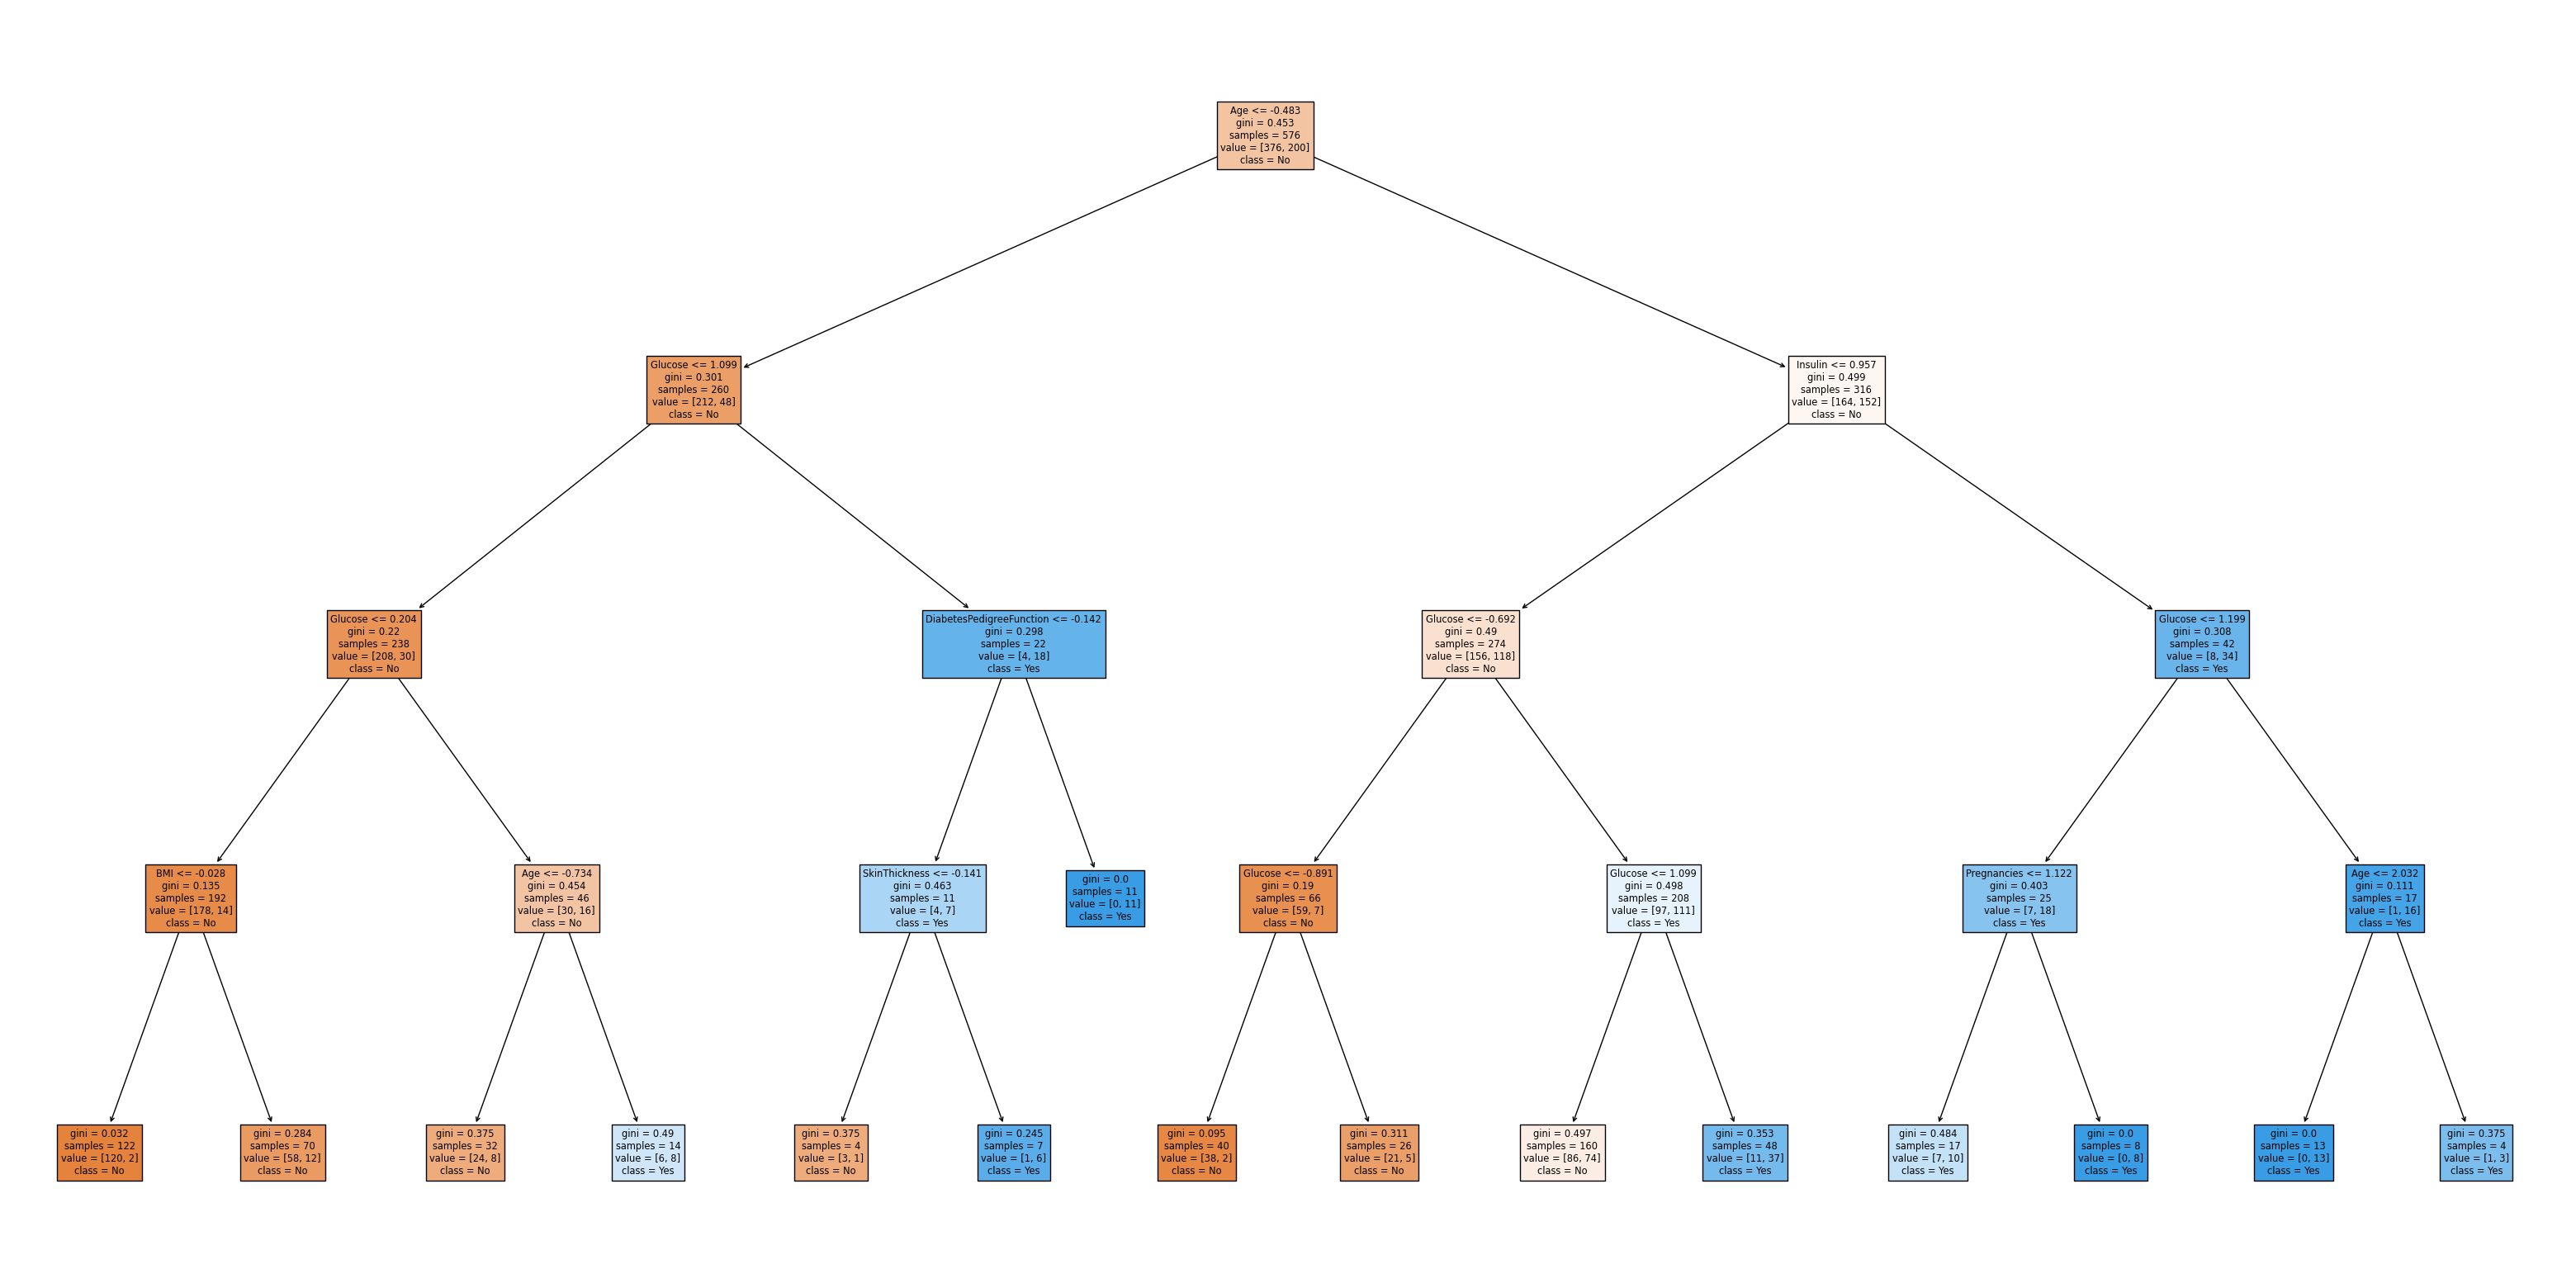

In [144]:
plt.figure(figsize=(40,20))
from sklearn.tree import plot_tree
plot_tree(classifier1,class_names=['No','Yes'],feature_names=list(x.columns),filled=True)
plt.show()

In [156]:
from sklearn.model_selection import RandomizedSearchCV
param_dist={ 'max_depth':[2,3,4,5],
             'max_features':[1,3,5,10],
             'min_samples_split':[2,3,5,10],
               'criterion': ['gini','entropy'],
             'min_samples_leaf':[1,2,3,4]}

random_search= RandomizedSearchCV(classifier, param_distributions=param_dist, cv=5, scoring= 'accuracy')
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': [1, 3, 5, 10],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 5, 10]},
                   scoring='accuracy')

In [160]:
random_search.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 5,
 'criterion': 'gini'}

In [162]:
best_model = random_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=5, max_features=3, min_samples_split=10)

In [158]:
classifier2 = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=3, min_samples_leaf=1, min_samples_split=10)
classifier2.fit(X_train, Y_train)
y_pred2 = classifier2.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
y_pred2_train = classifier2.predict(X_train)
print(accuracy_score(Y_train,y_pred2_train))

0.7291666666666666
0.8090277777777778


In [163]:
classifier2.feature_importances_

array([0.00982855, 0.57740088, 0.        , 0.02615556, 0.04310896,
       0.20827772, 0.02480202, 0.11042631])

In [165]:
x2 = data.iloc[:,:-1]
print(dict(zip(x2.columns, classifier2.feature_importances_)))

{'Pregnancies': 0.009828547244767097, 'Glucose': 0.5774008836694695, 'BloodPressure': 0.0, 'SkinThickness': 0.026155562271698733, 'Insulin': 0.04310896225049582, 'BMI': 0.20827771856747732, 'DiabetesPedigreeFunction': 0.024802018433434467, 'Age': 0.11042630756265706}


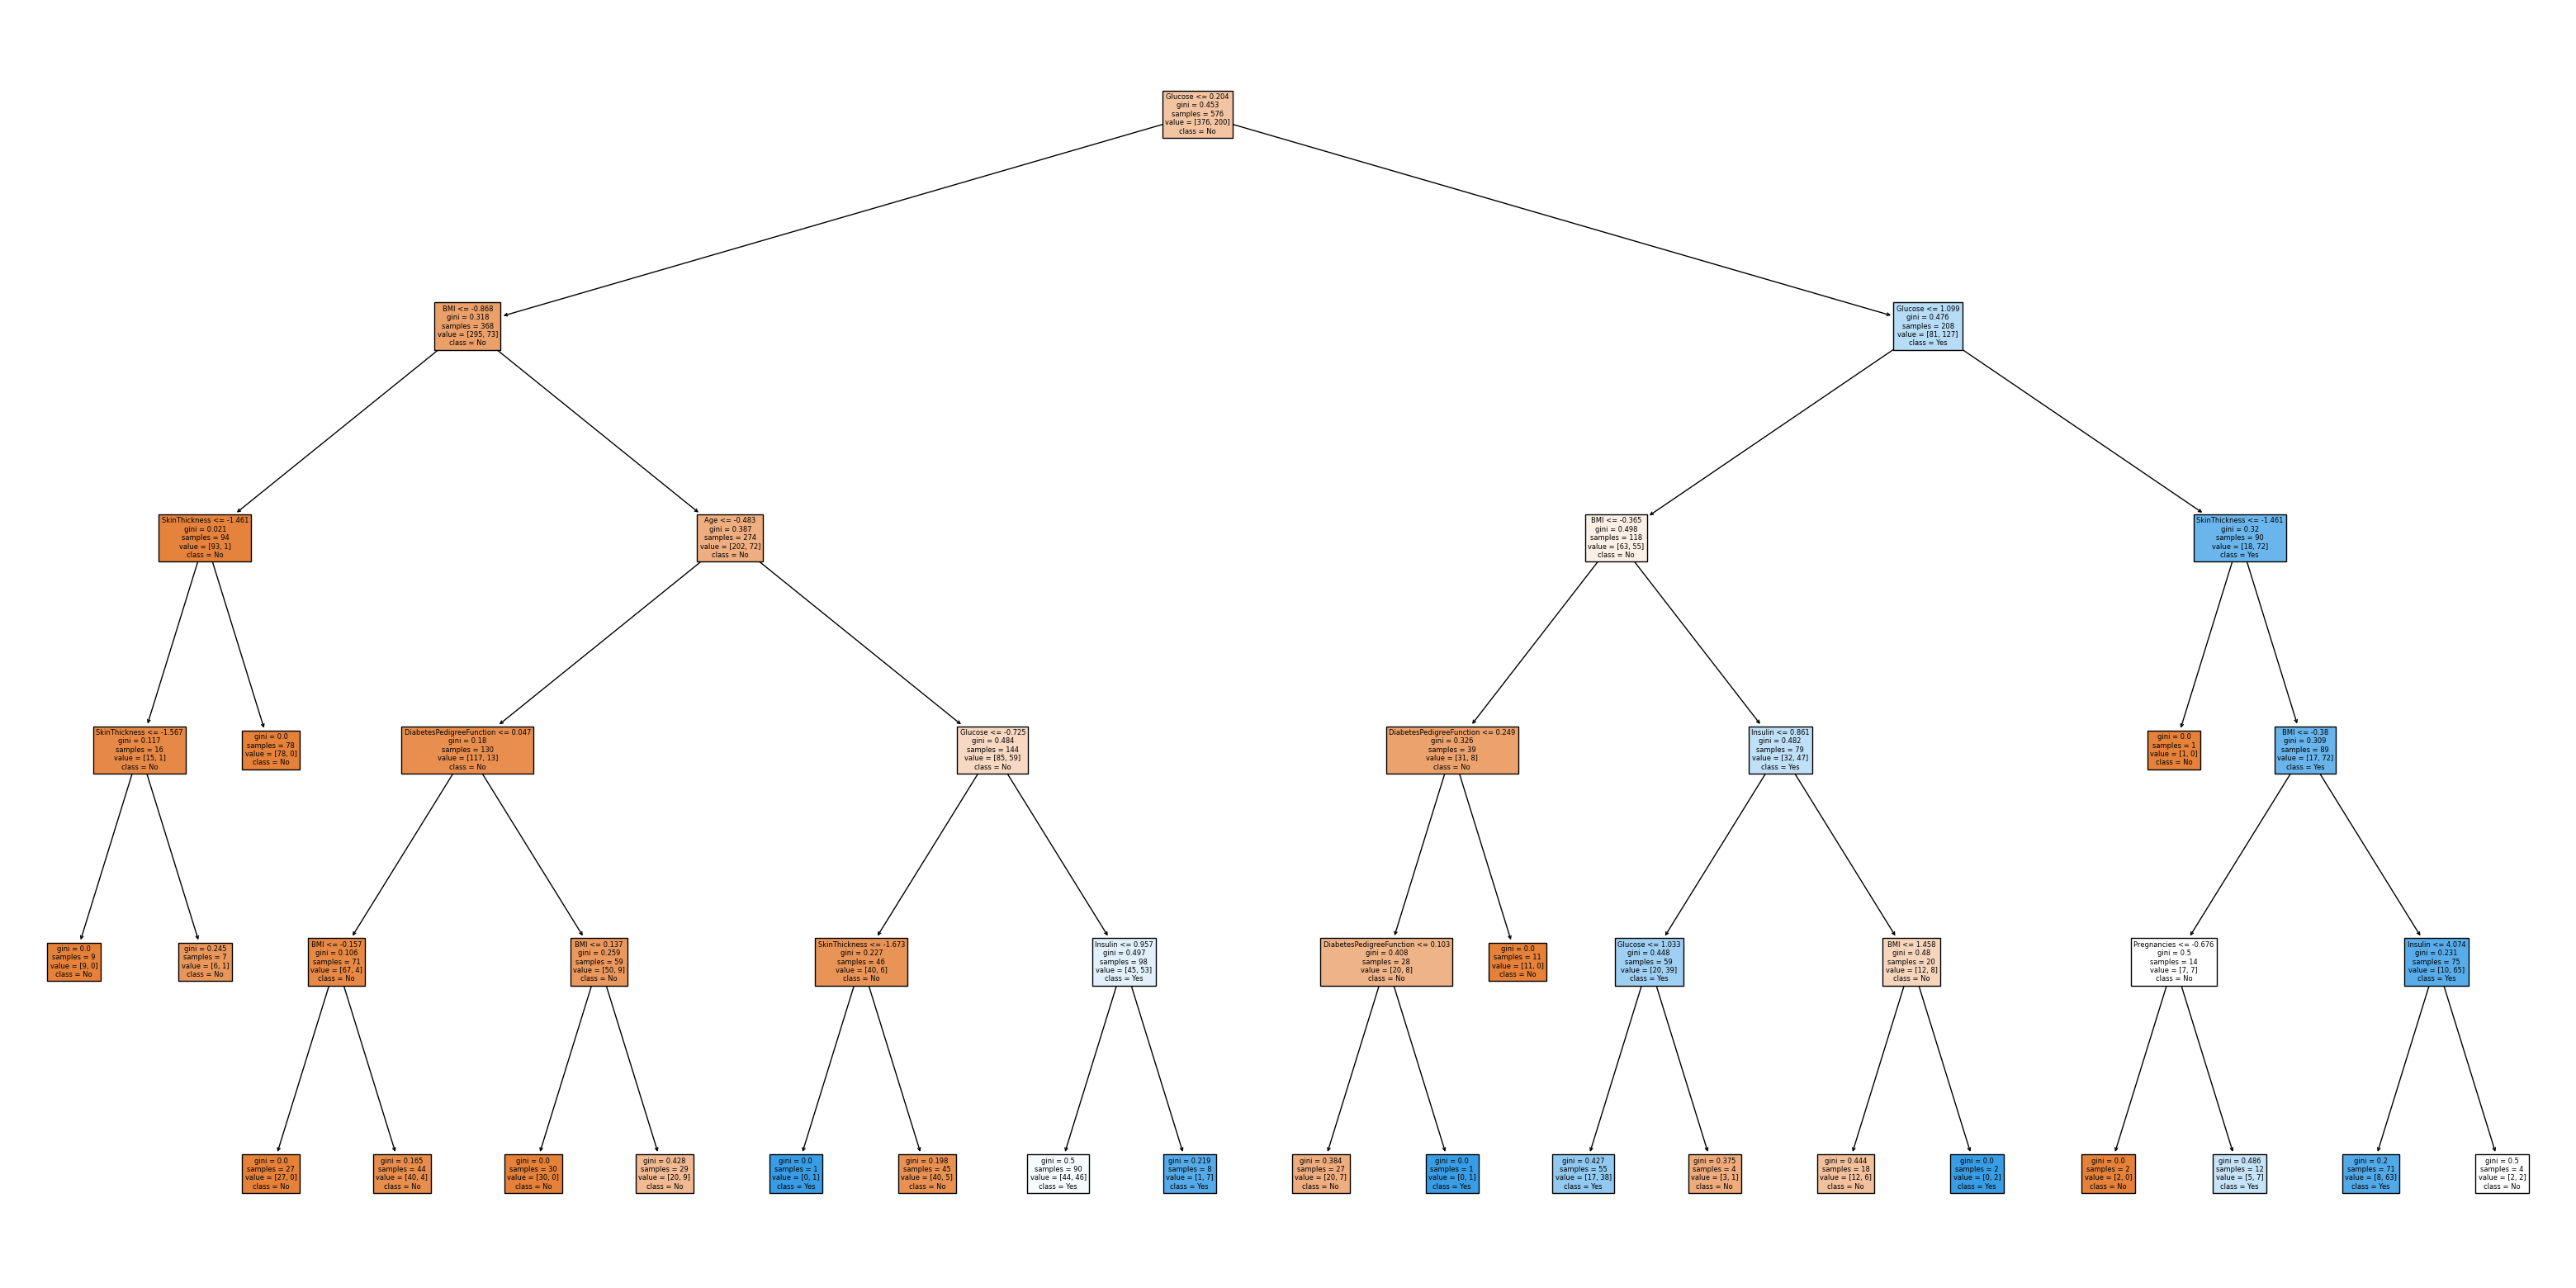

In [166]:
plt.figure(figsize=(40,20))
from sklearn.tree import plot_tree
plot_tree(classifier2,class_names=['No','Yes'],feature_names=list(x2.columns),filled=True)
plt.show()